In [97]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import random
from sklearn.cluster import KMeans, DBSCAN
from sklearn.mixture import GaussianMixture
!pip install scikit-learn-extra
from sklearn_extra.cluster import KMedoids

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Executive Summary**


For this project, we were to analyze customer engagement with various marketing activities including activities, campaigns, and targeting personalized offers. Based on these feature categories, we were to create the best possible customer segments from the given data to optimize ROI. After analyzing the data, there were several major findings at the forefront. First, we found out that most of the information provided in the data dictionary has little to no impact at all for example: age, kids at home, teenager at home or even if a customer accepted the offer or not. Secondly, we found that within the data there was 3 major clusters or groups of customers. The models that were found to work the best for this set of data was KMedoids with clustering of 3 and a random state of 40 or the Gaussian Mixture Model using clustering of 3 and random state of 40. Both of these models worked identically with this data set. Key next steps would be to break down the three sets of customers individually finding the key items for each cluster that they fall within. This way moving forward there would be three clearly defined set of actions to target the three sets of customers. IE: lower income brackets could see a rise in fast food purchases, lower ticket items and bargain shopping. Where the higher income bracket has larger purchase decisions which translates to larger purchases and higher end goods and services not requiring a bargain basement deal purchase.

**Problem and Solution Summary**


The easiest way to summarize the problem we are solving for is to really place a tremendous value in understanding the importance of your customer base. Understanding what drives them, what entices them and most importantly who they are. To do that we would have to understand that customers come from a wide range of different diversities and ethnic background. We would need to understand which of those impact purchase trends i.e.: purchases of goods, services, etc. Using this data set really helped us understand exactly that. This proposed solution clusters the customers into 3 clearly defined segments. With that information the sky is the limits. We can make 3 completely customized marketing plans that drive each of the segmentation, ranging from the bargain sale cluster to the mid-range cluster, to the cluster of customers that buy the most. By filtering out the obsolete features we have found that income, types of foods and web purchases, was able to give us a clearly defined classification of customer segmentations. These features allow for further investigations into the habits of the three main clusters.

**Recommendations for Implementation**


Key recommendations would be to adopt the recommendation and use this as a starting point to better understand the current clientele base. If data is continued to be collected from each cluster within no time at all we could run this specific analysis again further breaking up the clusters creating tiers of customers in each cluster. This would not only help you from an ROI standpoint but help grow your business year over year. You can start loyalty programs, referral programs, giveaways, coupons and the newest program subscriptions. You can create subscriptions based on the tiers of sales. Enticing each group to upgrade to the next tier year over year. The biggest risk and or challenges would be to gain buy in from the highest tier. This is where diving deeper would be essential to keep the top tier customer base. This cluster is not motivated by sales or products, they simply buy what they want. Another risk would be alienating a tier of members by focusing too much on the other. There could be great gains though by helping customers to spend on items that may be just outside their reach but incentives to help them gain loyalty points to obtains these items.

**Marketing Campaign Analysis**

**Problem Definition**


It is important to understand your customer base because they come from a wide range of people, ranging from different diversities and ethnic background. Some of those do impact purchase trends, but more importantly it to find trends based upon their current behaviors ie: purchases of goods, services, etc.







**The Objective:**


The intended goal of this exercise was to dig deeper than the obvious and discover trends and patterns of a customer base. It is also intended to educate the company and marketing department to understand the intricates and how to reach them.


**The key questions:**

The key questions that are needed to be answered are:

1. What is the average income of your customers?

2. What goods do these customers spend money on?

3. What is my median audience looking for?

4. Is there a way to maximize sales productivity with my current customer base?



**The problem formulation:**


As a Data Scientist we are trying to solve the riddle of what a customer is, what makes up a customer, what drives a customer, and what type of customer are we looking for?


**DataDictionary**
The dataset contains the following features:

ID: Unique ID of each customer

Year_Birth: Customer’s year of birth

Education: Customer's level of education

Marital_Status: Customer's marital status

Kidhome: Number of small children in customer's household

Teenhome: Number of teenagers in customer's household

Income: Customer's yearly household income

Recency: Number of days since the last purchase

Dt_Customer: Date of customer's enrollment with the company

MntFishProducts: The amount spent on fish products in the last 2 years

MntMeatProducts: The amount spent on meat products in the last 2 years

MntFruits: The amount spent on fruits products in the last 2 years

MntSweetProducts: Amount spent on sweet products in the last 2 years

MntWines: The amount spent on wine products in the last 2 years

MntGoldProds: The amount spent on gold products in the last 2 years

NumDealsPurchases: Number of purchases made with discount

NumCatalogPurchases: Number of purchases made using a catalog (buying goods to beshipped through the mail)

NumStorePurchases: Number of purchases made directly in stores

NumWebPurchases: Number of purchases made through the company's website

NumWebVisitsMonth: Number of visits to the company's website in the last month

AcceptedCmp1: 1 if customer accepted the offer in the first campaign, 0 otherwise

AcceptedCmp2: 1 if customer accepted the offer in the second campaign, 0 otherwise

AcceptedCmp3: 1 if customer accepted the offer in the third campaign, 0 otherwise

AcceptedCmp4: 1 if customer accepted the offer in the fourth campaign, 0 otherwise

AcceptedCmp5: 1 if customer accepted the offer in the fifth campaign, 0 otherwise

Response: 1 if customer accepted the offer in thelast campaign, 0 otherwise

Complain: 1 If the customer complained in the last 2 years, 0 otherwise


**Data Overview**



In [98]:
dataframe = pd.read_csv("/content/marketing_camp.csv")  # reads the data
df = dataframe.copy(deep=True)                          # make a deep copy

In [99]:
df.shape    # displays the shape of the data

(2240, 27)

In [100]:
df.head(10)    # displays the top 10 rows of the data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,3,6,5,0,0,0,0,0,0,0
5,7446,1967,Master,Together,62513.0,0,1,09-09-2013,16,520,...,4,10,6,0,0,0,0,0,0,0
6,965,1971,Graduation,Divorced,55635.0,0,1,13-11-2012,34,235,...,3,7,6,0,0,0,0,0,0,0
7,6177,1985,PhD,Married,33454.0,1,0,08-05-2013,32,76,...,0,4,8,0,0,0,0,0,0,0
8,4855,1974,PhD,Together,30351.0,1,0,06-06-2013,19,14,...,0,2,9,0,0,0,0,0,0,1
9,5899,1950,PhD,Together,5648.0,1,1,13-03-2014,68,28,...,0,0,20,1,0,0,0,0,0,0


**Observations:**


The data has 27 columns and 2240 rows

**Exploratory Data Analysis (EDA)**



In [101]:
df.nunique()   # displaying unique values

ID                     2240
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1974
Kidhome                   3
Teenhome                  3
Dt_Customer             663
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Response                  2
dtype: int64

In [102]:
df["Marital_Status"].unique() # displaying unique values

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [103]:
df["Education"].unique() # displaying unique values

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [104]:
df.info()     # displays Dtype of and any nulls

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

**Feature Engineering and Data Processing**



In [105]:
from math import nan          # converting into age
def convert_age(x):
  age = 2023 - int(x)

  return age if age < 101 else np.nan


df["Year_Birth"] = df["Year_Birth"].apply(convert_age)

df.rename(columns={"Year_Birth":"Age"}, inplace=True)

In [106]:
df.dropna(subset=["Age"], inplace=True)     # this simple addressed the outliers in age

In [107]:
df.drop(columns= ["ID", "Marital_Status", "Dt_Customer", "Recency", "NumCatalogPurchases", "NumStorePurchases", "NumWebVisitsMonth", "AcceptedCmp3", "AcceptedCmp4", "AcceptedCmp5", "AcceptedCmp1", "AcceptedCmp2", "Complain", "Response"], inplace=True)

In [108]:
df.sample(10)     # displaying 10 ramdonly

,Age,Education,Income,Kidhome,Teenhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases
574,42.0,Master,36959.0,1,0,25,6,25,6,0,0,2,2
202,45.0,Graduation,63693.0,0,1,587,43,337,42,87,54,3,11
1875,36.0,2n Cycle,23830.0,0,0,1,8,6,4,8,16,1,1
964,43.0,Graduation,50183.0,1,1,97,12,84,13,10,15,7,3
863,34.0,2n Cycle,38683.0,1,0,46,35,69,84,41,66,6,4
1922,67.0,Graduation,91249.0,0,0,1324,27,119,71,108,27,0,7
785,37.0,Basic,20425.0,1,0,4,12,5,3,16,17,2,2
848,60.0,Graduation,49980.0,0,1,104,1,54,13,9,14,2,3
1498,64.0,Graduation,71706.0,0,1,931,56,253,91,98,14,4,9
932,72.0,PhD,64950.0,0,1,819,0,72,12,0,63,2,11


In [109]:
df.isna().sum()   # checking for the amount of na

Age                   0
Education             0
Income               24
Kidhome               0
Teenhome              0
MntWines              0
MntFruits             0
MntMeatProducts       0
MntFishProducts       0
MntSweetProducts      0
MntGoldProds          0
NumDealsPurchases     0
NumWebPurchases       0
dtype: int64

In [110]:
df.shape   # displaying the shape of the data

(2237, 13)

In [111]:
max_income = df['Income'].max()        # addressing the one oiutlier in income
df = df[df['Income'] != max_income]

In [112]:
df["Income"].mean() # mean income

51958.81057866185

In [113]:
df["Education"].unique() # displays the unquie values

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [114]:
def normalize(x):  # clarifying eductaion categories
  if x == "2n Cycle":
    return "Associate"
  elif x == "Basic":
    return "High School"
  elif x == "Graduation":
    return "Bachelors"
  return x


df["Education"] = df["Education"].apply(normalize)
df_ed = df.groupby("Education")["Income"].mean()


<ipython-input-114-8b8a781b6a6f>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Education"] = df["Education"].apply(normalize)


In [115]:
def apply_income(row): # adjusting the income missing values with education mean income
  if pd.isnull(row["Income"]):
    return df_ed[row["Education"]]
  else:
    return row["Income"]


df["Income"] = df.apply(apply_income,axis=1)

<ipython-input-115-03f8949771b3>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Income"] = df.apply(apply_income,axis=1)


In [116]:
df.isna().sum() # confirming all na are addressed

Age                  0
Education            0
Income               0
Kidhome              0
Teenhome             0
MntWines             0
MntFruits            0
MntMeatProducts      0
MntFishProducts      0
MntSweetProducts     0
MntGoldProds         0
NumDealsPurchases    0
NumWebPurchases      0
dtype: int64

**Univariate Analysis on Numerical and Categorical data**



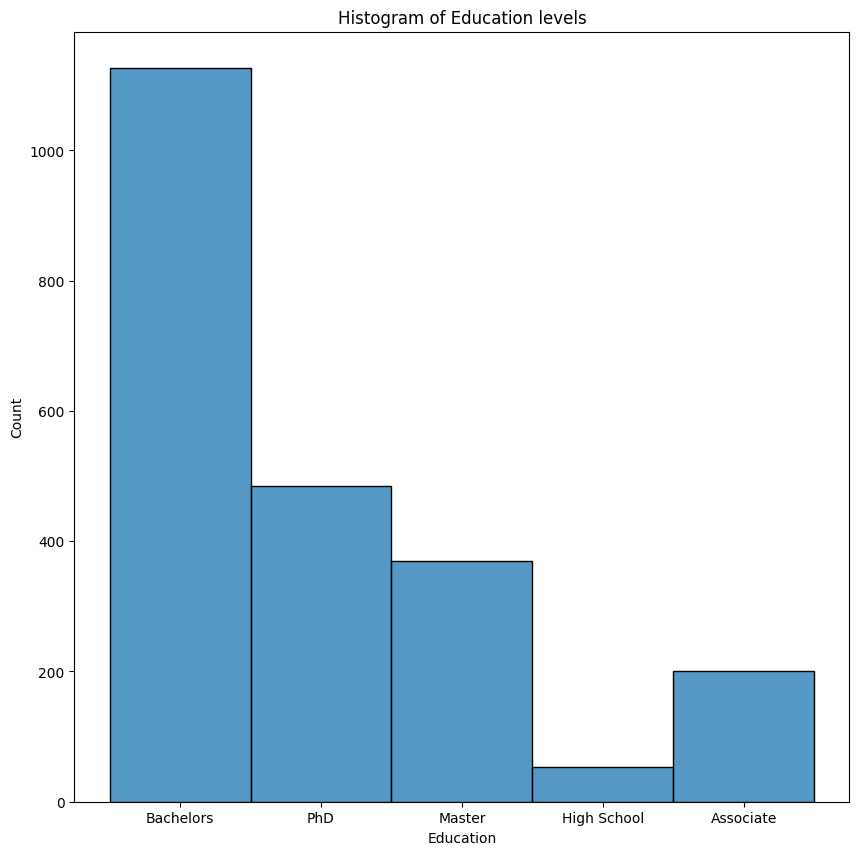

In [117]:
plt.figure(figsize=(10,10)) # visualizing education with a histogram
sns.histplot(data=df, x="Education")
plt.title("Histogram of Education levels")
plt.show()

**Observation**:

Most of out customers have a secondary degree.

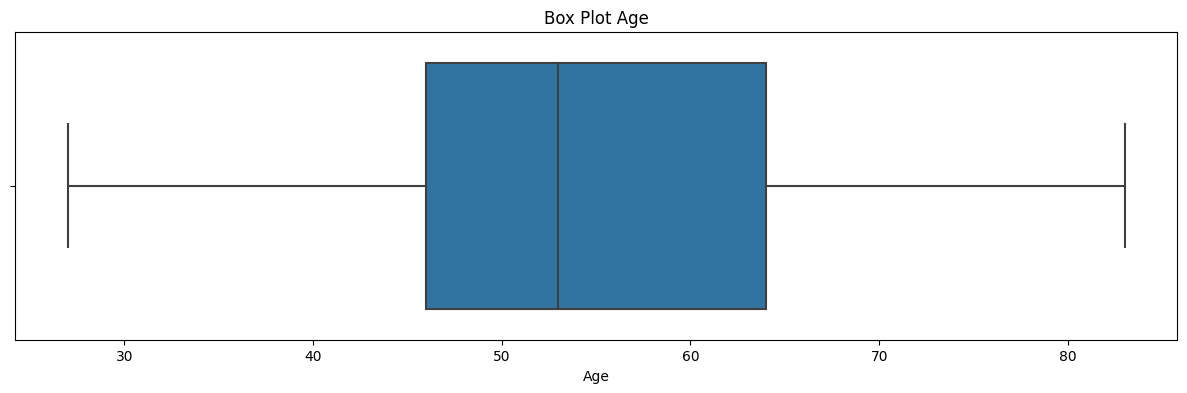

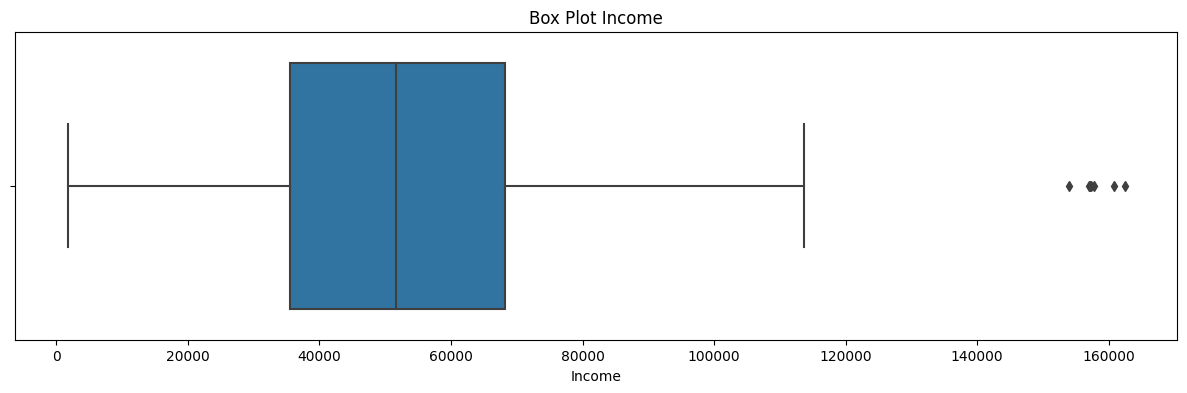

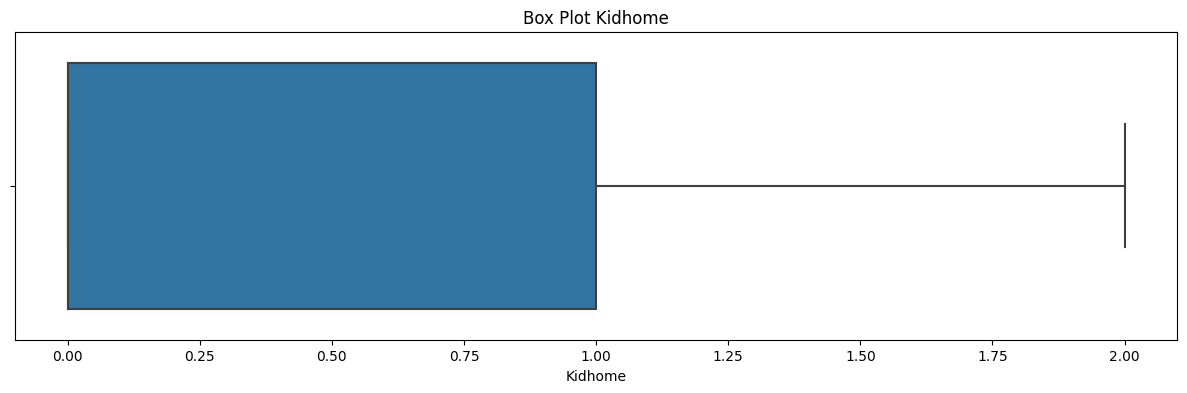

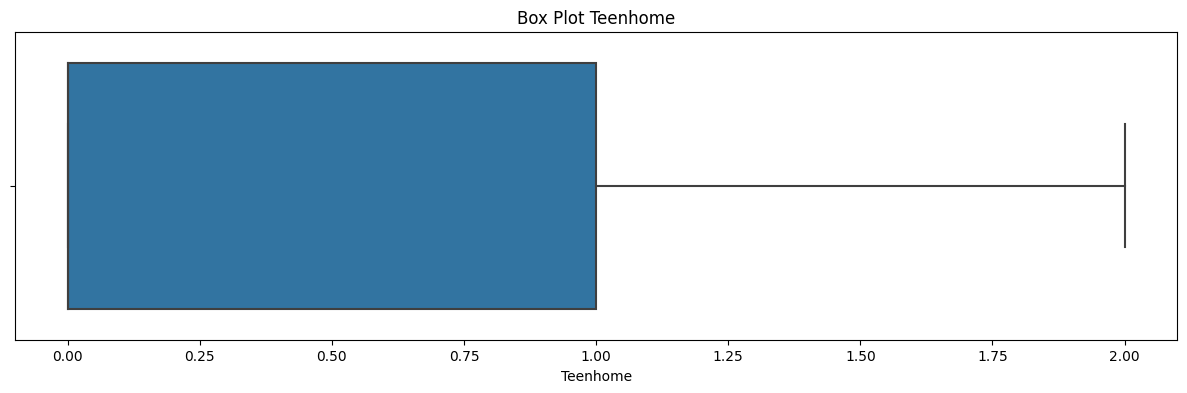

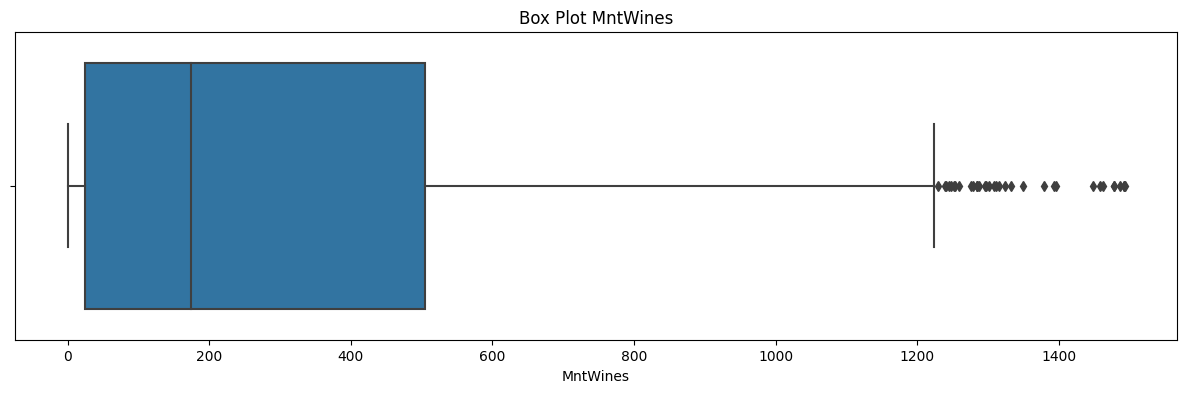

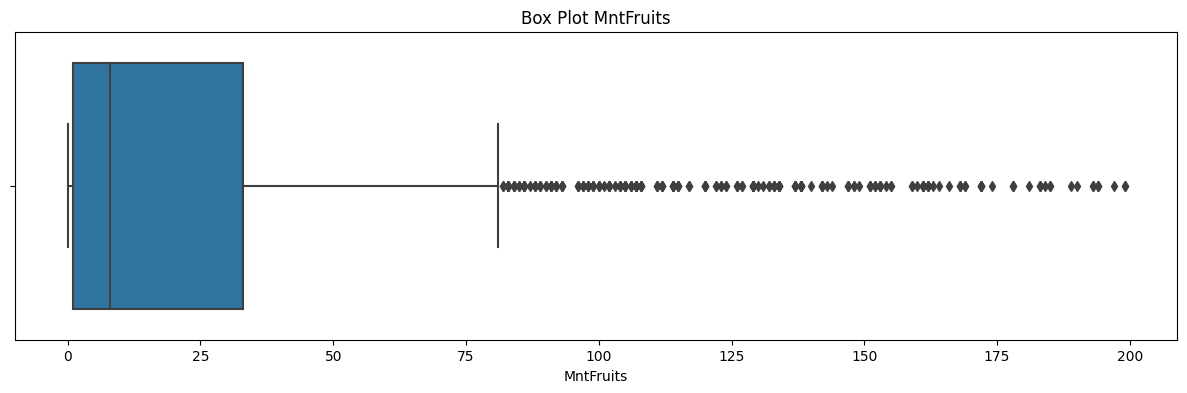

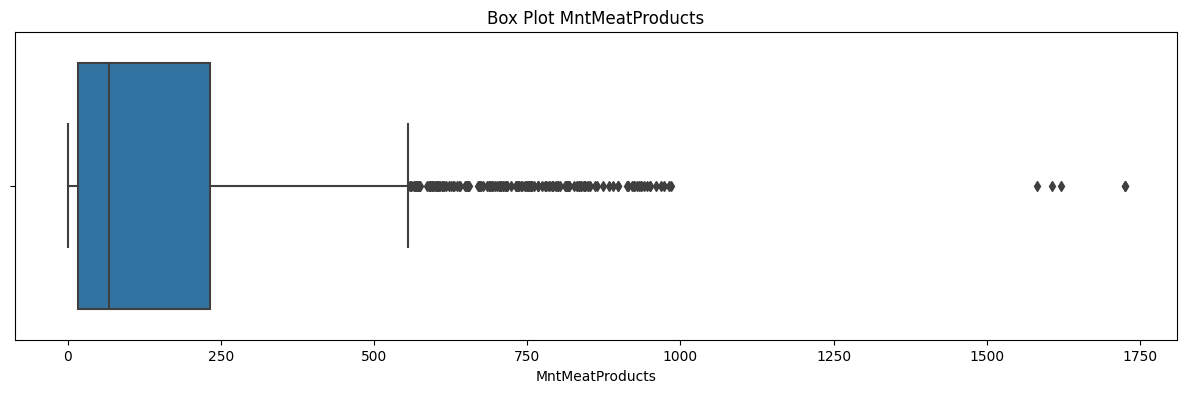

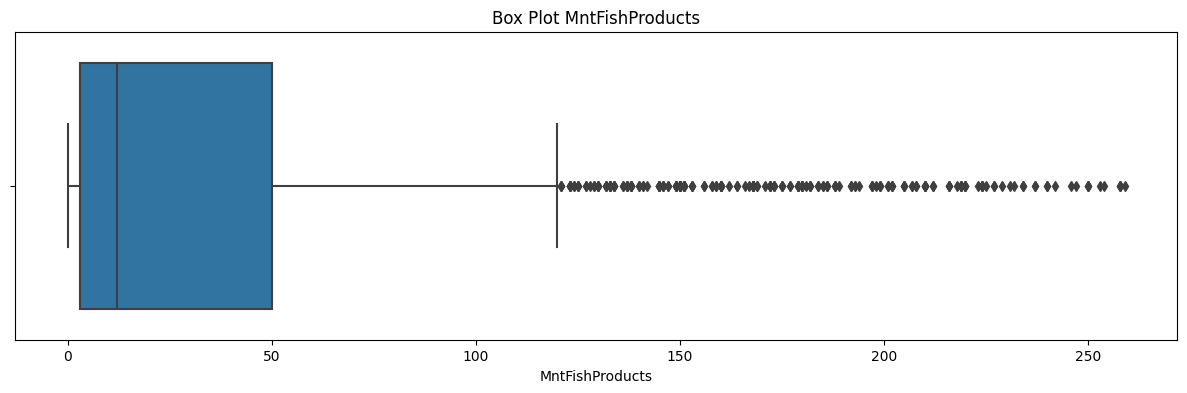

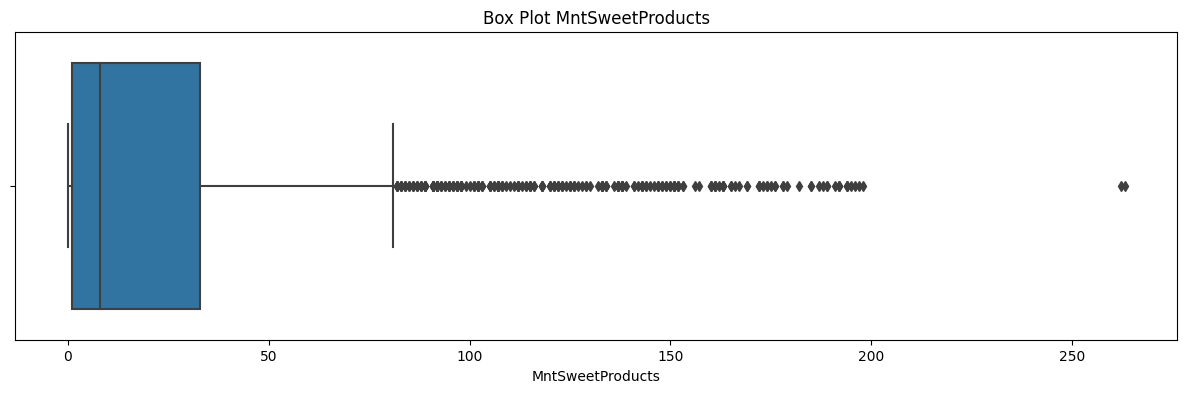

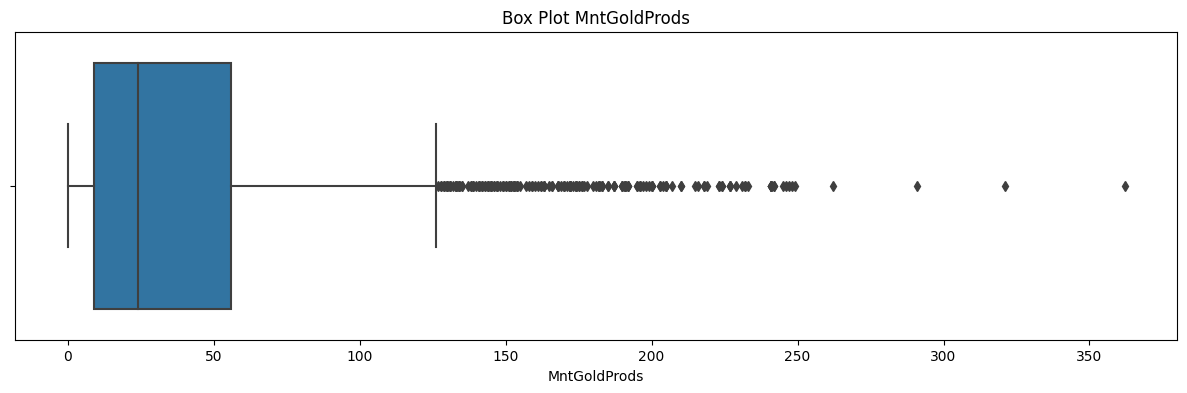

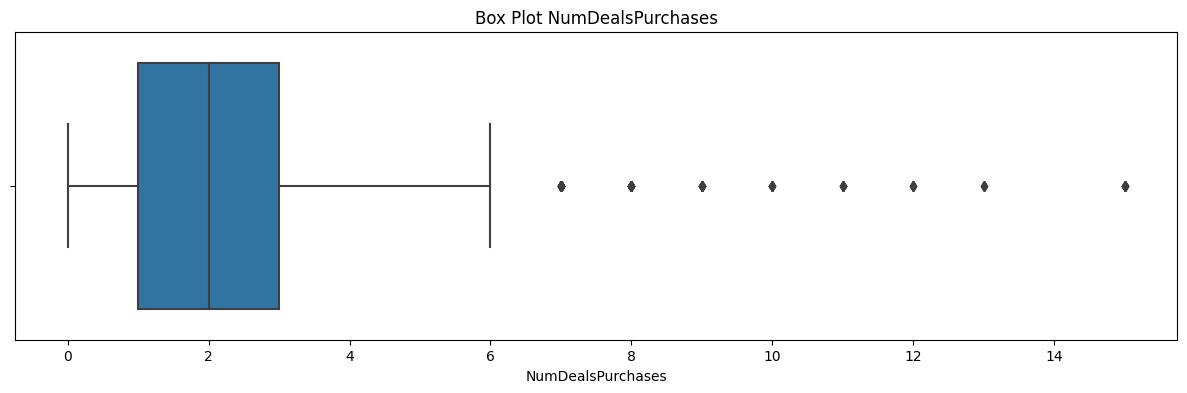

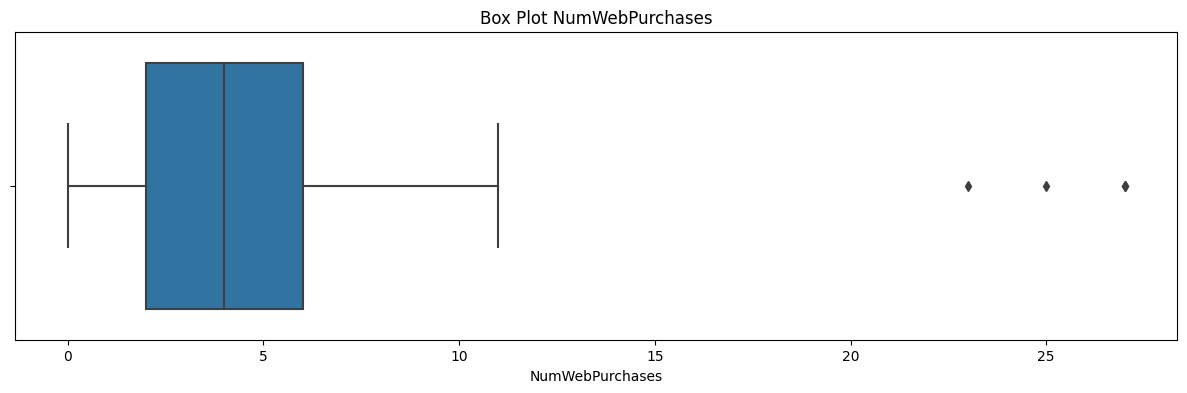

In [118]:
for column in df.columns:  # looping through the colums ploting boxplots
  if df[column].dtype == np.int64 or df[column].dtype == np.float64 :
    plt.figure(figsize = (15, 4))
    sns.boxplot(x=df[column])
    plt.title(f"Box Plot {column}")
    plt.show()

**Bivariate Analysis**

<ipython-input-119-fe5215a0a50f>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap="coolwarm", ax=ax)


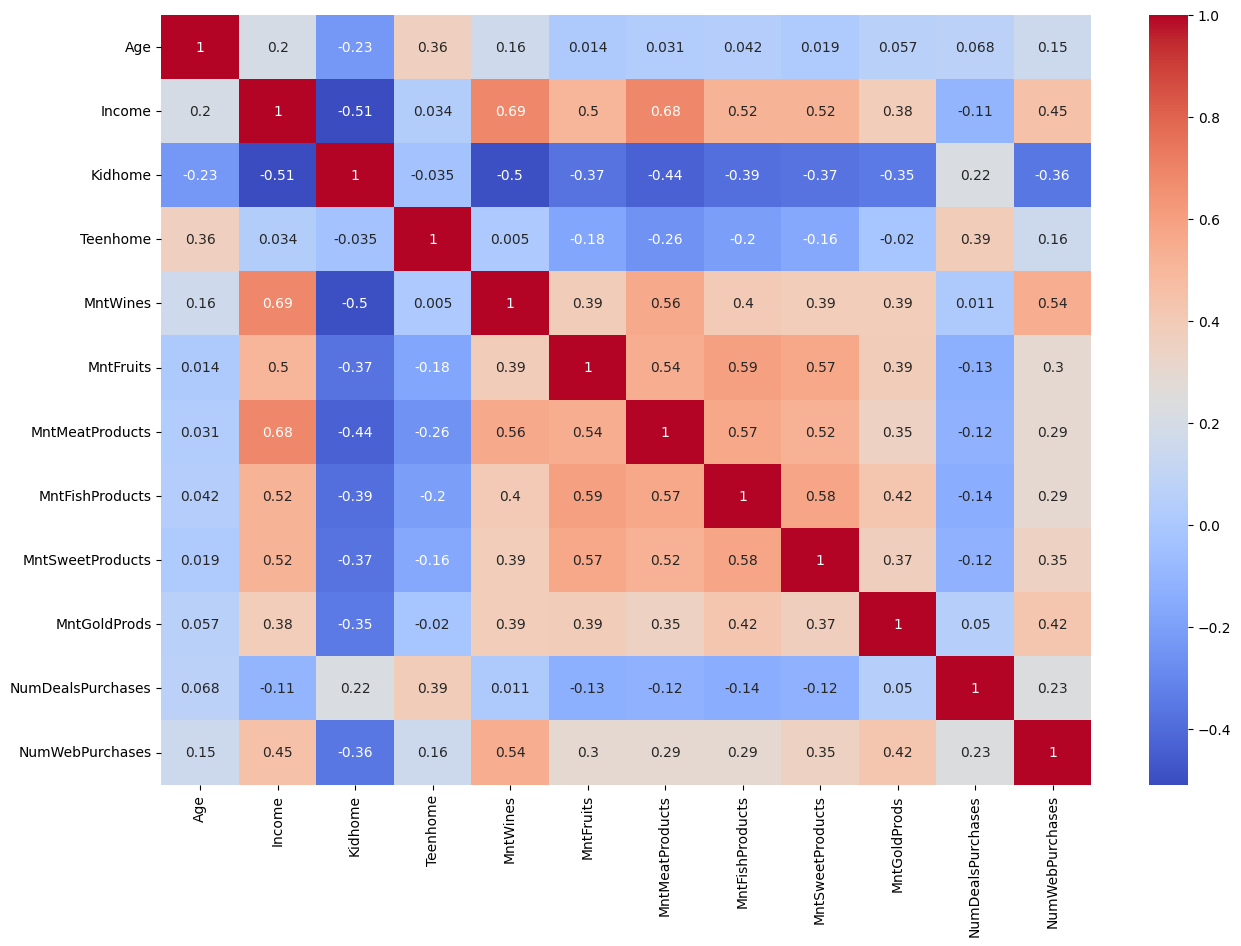

In [119]:
fig, ax = plt.subplots(figsize = (15, 10)) # displaying a heat map
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", ax=ax)
plt.show()

In [120]:
df.drop(columns= ["Age", "Education", "Kidhome", "Teenhome","NumDealsPurchases"], inplace=True) # dropping more columns

In [121]:
df.shape  # displaying shape

(2236, 8)

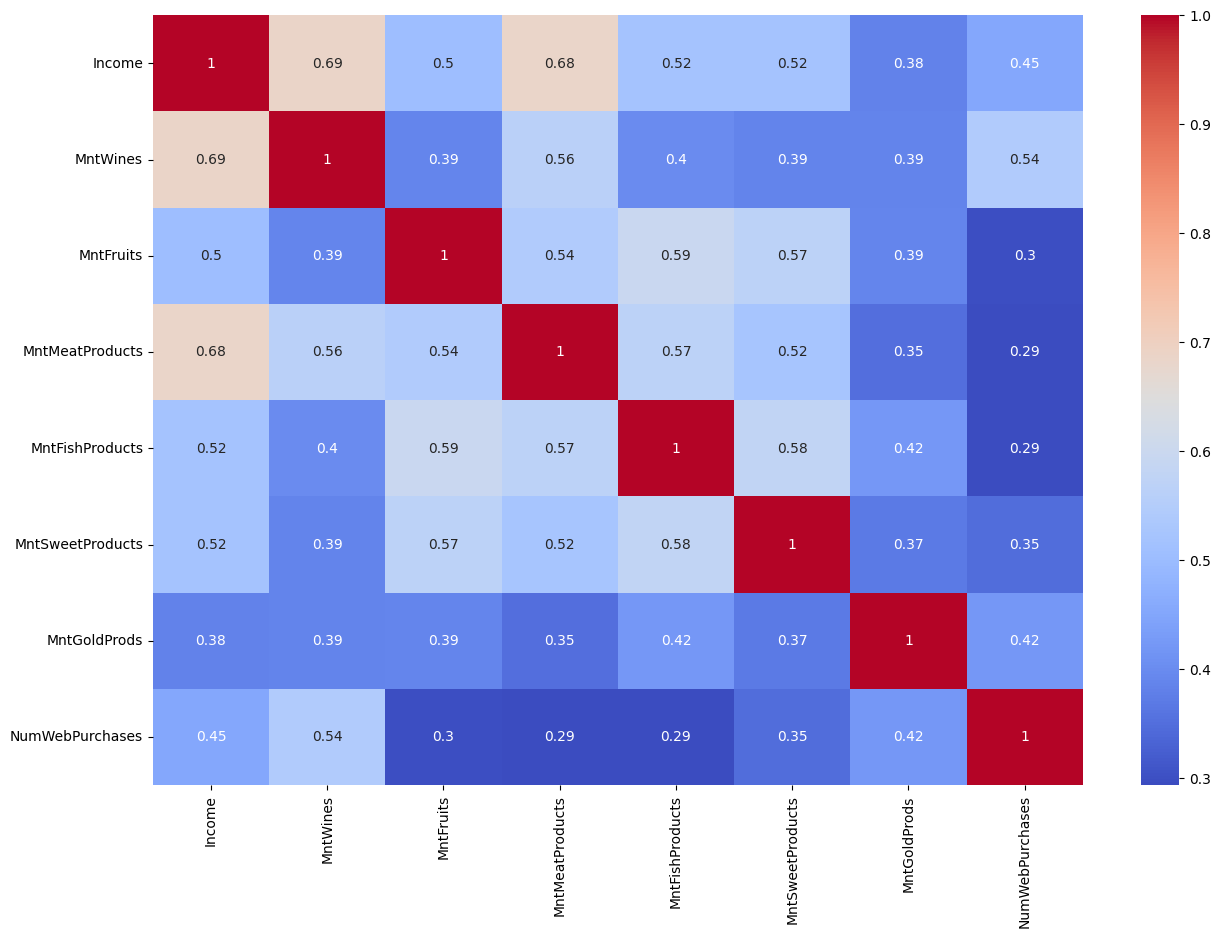

In [122]:
fig, ax = plt.subplots(figsize = (15, 10)) # displaying a heat map
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.show()


**Data Preparation for Segmentation**


In [123]:
scaler_s = StandardScaler()    # scaling the data
scaled_data = scaler_s.fit_transform(df)
scaled_df2 = pd.DataFrame(scaled_data, columns=df.columns)
scaled_df2

,Income,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumWebPurchases
0,0.288329,0.983228,1.554170,1.679746,2.461068,1.475396,0.845669,1.407639
1,-0.262583,-0.871064,-0.636431,-0.713455,-0.650414,-0.631638,-0.729742,-1.110921
2,0.917763,0.362159,0.572177,-0.177201,1.344595,-0.147262,-0.038098,1.407639
3,-1.182701,-0.871064,-0.560893,-0.651409,-0.503991,-0.583200,-0.748954,-0.751127
4,0.295569,-0.389661,0.421101,-0.217088,0.154911,-0.001950,-0.556831,0.328256
...,...,...,...,...,...,...,...,...
2231,0.432433,1.203128,0.421101,0.066551,0.081700,2.201960,3.900428,1.767433
2232,0.562804,0.302727,-0.661610,-0.607091,-0.687019,-0.655857,-0.691317,1.407639
2233,0.234284,1.794481,0.546997,0.221666,-0.101329,-0.365231,-0.383920,-0.751127
2234,0.807151,0.368102,0.093769,0.208371,0.777208,0.070707,0.326936,0.688050


In [124]:
scaled_df2.shape[1] #shape again

8

**Applying PCA and T-SNE to the data to visualize the data distributed in 2 dimensions**


In [125]:
n = scaled_df2.shape[1]
pca = PCA(n_components=scaled_df2.shape[1], random_state=1) ## instantiate our prinicpal component analysis object n_components are 6
pca_data = pca.fit_transform(scaled_df2)
principal_components =  pd.DataFrame(data=pca.fit_transform(scaled_data)) # create the dataframe for the pca
principal_components

,0,1,2,3,4,5,6,7
0,3.759039,-0.701184,0.605059,0.504212,-0.175699,1.011309,0.414310,-0.865731
1,-1.924688,-0.452943,-0.339099,-0.211904,0.106249,-0.121921,-0.156493,0.458611
2,1.471900,0.495518,0.133195,0.626534,-0.634193,1.185647,-0.046847,0.715744
3,-2.072016,-0.440346,0.091655,0.111358,-0.042010,0.123264,0.064272,-0.294407
4,0.030574,-0.215088,-0.121079,0.617866,-0.415296,0.152356,0.143412,0.495578
...,...,...,...,...,...,...,...,...
2231,3.276095,1.616461,2.818109,-0.342212,1.252914,-1.315655,-0.411386,-0.366276
2232,-0.417367,1.708053,-0.572867,0.803550,-0.231739,0.260785,0.174378,0.598799
2233,0.522561,0.124922,-1.217717,-0.574954,-0.674638,-0.221867,-1.164234,-0.718857
2234,1.176075,0.364946,-0.001928,-0.002030,0.019330,0.564211,0.007783,0.439817


In [126]:
exp = pca.explained_variance_ratio_ # gives us the eigenvalues corresponding to each principal component

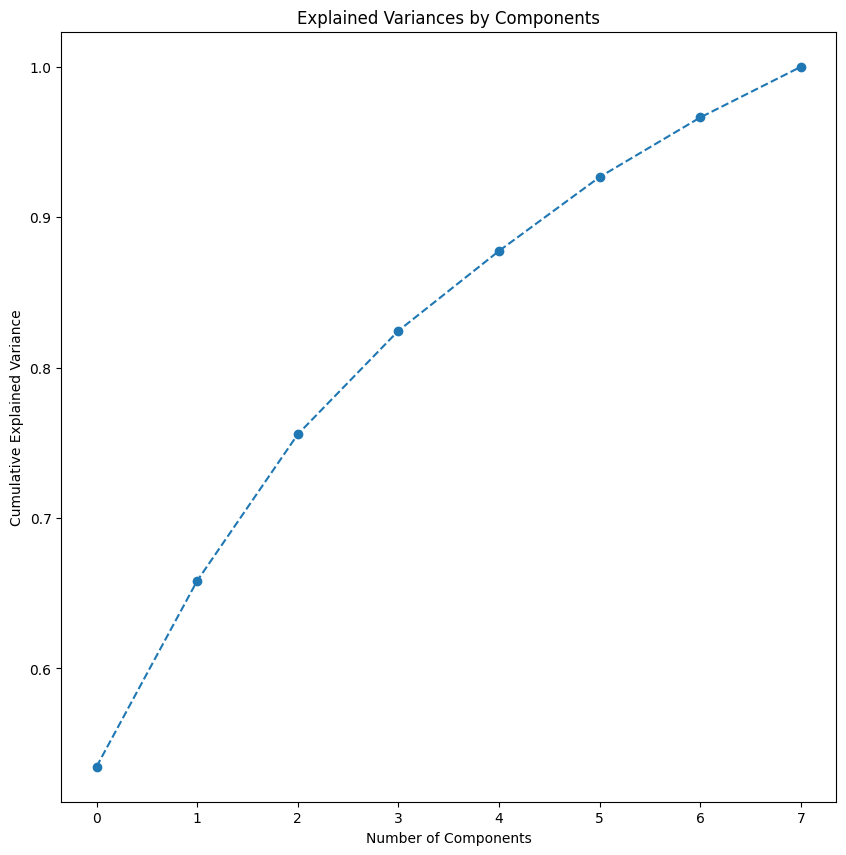

In [127]:
plt.figure(figsize=(10,10))
plt.plot(range(0, 8), exp.cumsum(), marker = "o", linestyle = "--") # creating our elbow plot for further visualization
plt.title("Explained Variances by Components")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.show()

In [128]:
sum = 0
for ix, i in enumerate(exp):
    sum = sum + i
    if(sum>0.90):  # formula for 90% variance we find that droping 10% of the data
        print("Number of PCs that explain at least 90% variance: ", ix + 1)
        break

Number of PCs that explain at least 90% variance:  6


In [129]:
pc_comps = ["PC1", "PC2", "PC3", "PC4", "PC5", "PC6", "PC7", "PC8"] # simple array for index
df_pca = pd.DataFrame(np.round(pca.components_[:9,:], 2), columns = scaled_df2.columns)
df_pca

,Income,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumWebPurchases
0,0.40,0.36,0.36,0.38,0.37,0.36,0.30,0.29
1,0.11,0.41,-0.37,-0.17,-0.36,-0.30,0.21,0.62
2,-0.38,-0.36,0.15,-0.38,0.16,0.14,0.69,0.21
3,-0.12,-0.11,0.14,-0.30,-0.03,0.51,-0.57,0.52
4,0.09,-0.07,-0.77,0.10,0.04,0.58,0.15,-0.14
5,-0.10,0.01,-0.31,-0.06,0.83,-0.35,-0.20,0.19
6,-0.08,-0.58,-0.07,0.68,-0.14,-0.15,-0.01,0.39
7,0.80,-0.47,-0.00,-0.35,0.03,-0.12,0.02,0.02


In [130]:
def color_high(val):
    if val <= -0.40:
        return "background: green"

    elif val >= 0.40:
        return "background: red"

df_pca.T.style.applymap(color_high)  # here we use applymap function to pass each value into color_high for dimension reduction

,0,1,2,3,4,5,6,7
Income,0.400000,0.110000,-0.380000,-0.120000,0.090000,-0.100000,-0.080000,0.800000
MntWines,0.360000,0.410000,-0.360000,-0.110000,-0.070000,0.010000,-0.580000,-0.470000
MntFruits,0.360000,-0.370000,0.150000,0.140000,-0.770000,-0.310000,-0.070000,-0.000000
MntMeatProducts,0.380000,-0.170000,-0.380000,-0.300000,0.100000,-0.060000,0.680000,-0.350000
MntFishProducts,0.370000,-0.360000,0.160000,-0.030000,0.040000,0.830000,-0.140000,0.030000
MntSweetProducts,0.360000,-0.300000,0.140000,0.510000,0.580000,-0.350000,-0.150000,-0.120000
MntGoldProds,0.300000,0.210000,0.690000,-0.570000,0.150000,-0.200000,-0.010000,0.020000
NumWebPurchases,0.290000,0.620000,0.210000,0.520000,-0.140000,0.190000,0.390000,0.020000


**Observation:**

PCA does not seem like it is going to be a useful tool with this data set.

In [131]:
tsne = TSNE(random_state=1, n_components=2) # instantiate our TSNE object with required random state 1 and n_components 2 (2 pca components)
tsne_data = tsne.fit_transform(scaled_df2) # fit transform the data
tsne_data = pd.DataFrame(data=tsne_data)
tsne_data

,0,1
0,51.379345,-19.793285
1,-19.198088,-35.202229
2,21.995920,-4.446088
3,-46.769669,1.420963
4,5.518407,-7.778468
...,...,...
2231,48.728306,-7.663517
2232,0.605305,35.886436
2233,23.549232,5.875597
2234,22.322115,-0.259228


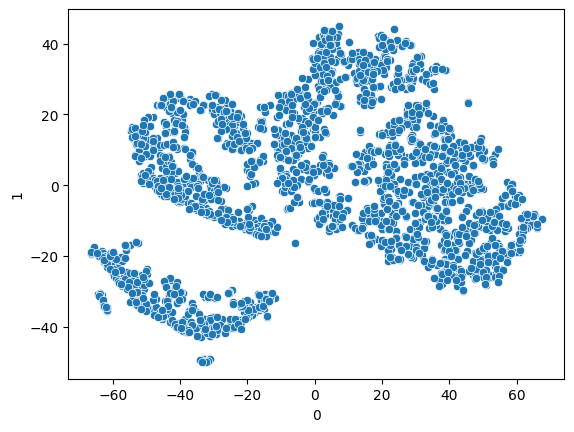

In [132]:
sns.scatterplot(x = tsne_data.iloc[:,0], y = tsne_data.iloc[:,1]) # iloc requires 2 index with left reprensenting the row and right representing the column
plt.show()

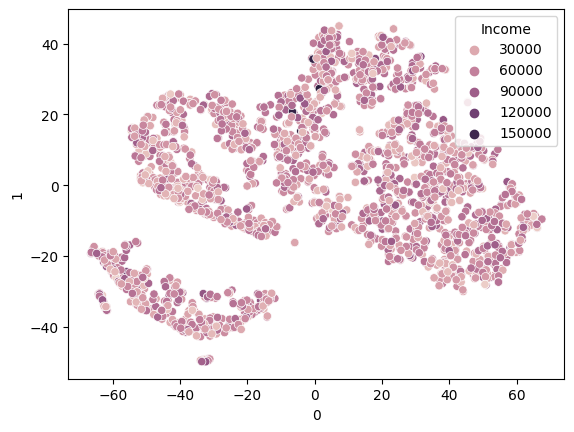

In [133]:
sns.scatterplot(x = tsne_data.iloc[:,0], y = tsne_data.iloc[:,1], hue = df.Income) # just changing hue based on income
plt.show()

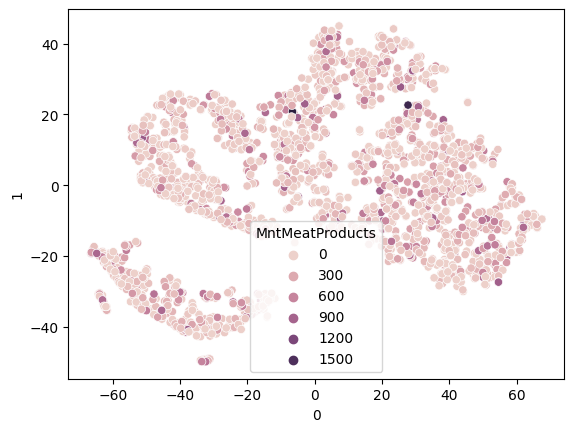

In [134]:
sns.scatterplot(x = tsne_data.iloc[:,0], y = tsne_data.iloc[:,1], hue = df.MntMeatProducts) # just changing hue based on meat
plt.show()

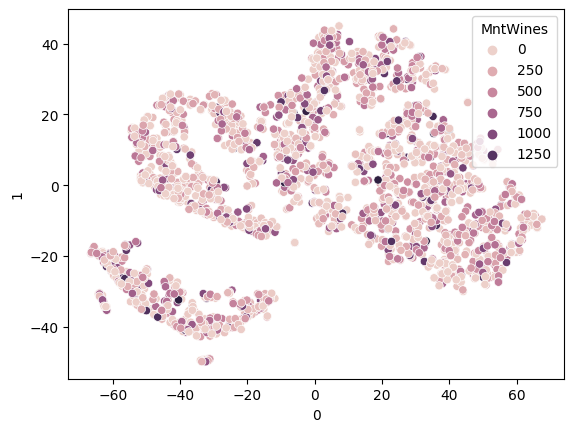

In [135]:
sns.scatterplot(x = tsne_data.iloc[:,0], y = tsne_data.iloc[:,1], hue = df.MntWines) # just changing hue based on wine
plt.show()

**Observations:**

T-SNE just like PCA simply does not seem like it is going to be a useful tool with this data set.

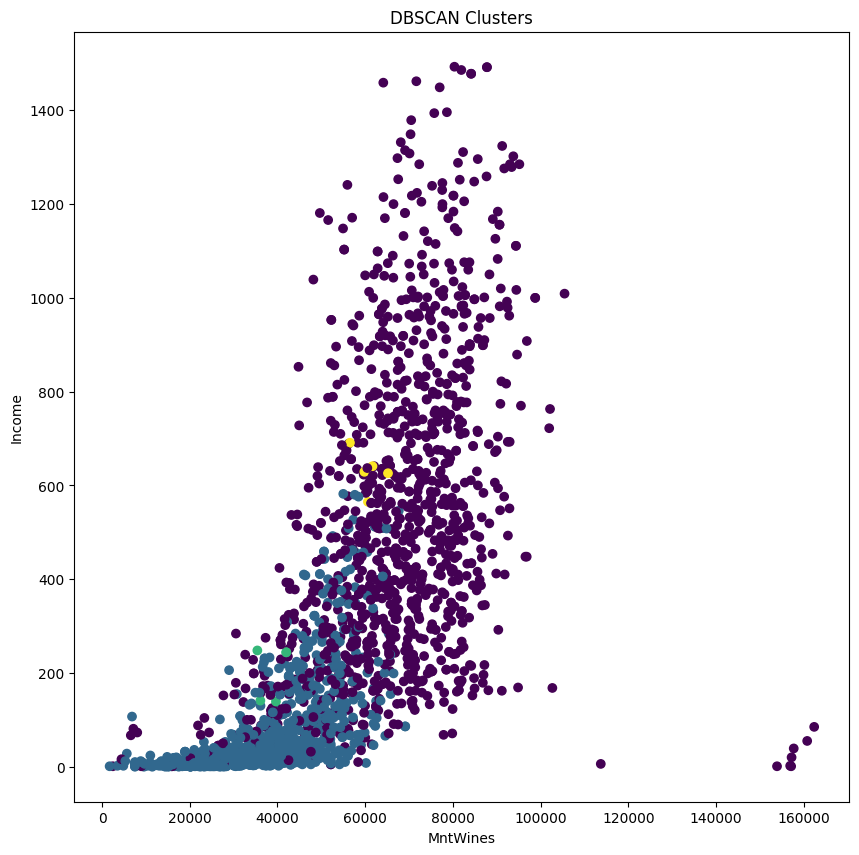

In [136]:
dbscan = DBSCAN(eps=0.5, min_samples=5) # visualizing using DBSCAN
clust = dbscan.fit_predict(scaled_df2)
df["cluster"] = clust
plt.figure(figsize=(10,10))
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=df["cluster"])
plt.title("DBSCAN Clusters")
plt.xlabel("MntWines")
plt.ylabel("Income")
plt.show()

**Observations:**


Just like T-SNE just like PCA, DBSCAN is also does not seem it is going to be a useful tool with this data set.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

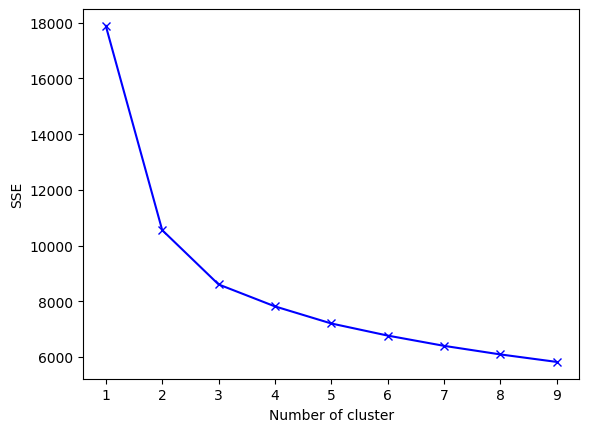

In [137]:
sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters = k, max_iter = 1000, random_state = 1).fit(scaled_df2)  # iterate for a range of Ks and fit the data components to the algorithm.
    sse[k] = kmeans.inertia_                                                         # Use inertia attribute from the clustering object and store the inertia value for that K
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()), 'bx-')
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

In [138]:
kmeans = KMeans(n_clusters=3) # applying the K-Means algorithm
kmeans.fit(scaled_df2)
scaled_df2['Labels'] = kmeans.labels_
tsne_data['Labels'] = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [139]:
mean = scaled_df2.groupby('Labels').mean() # groupby labels to get the average
median = scaled_df2.groupby('Labels').median()  # groupby labels to get the median
df_kmeans = pd.concat([mean, median], axis = 0) # concat mean and median
df_kmeans.index = ['group_0 Mean', 'group_1 Mean', 'group_2 Mean', 'group_0 Median', 'group_1 Median', 'group_2 Median']
df_kmeans.T

,group_0 Mean,group_1 Mean,group_2 Mean,group_0 Median,group_1 Median,group_2 Median
Income,0.497302,1.082675,-0.777123,0.479004,1.099657,-0.767064
MntWines,0.660697,0.797050,-0.750802,0.475081,0.651892,-0.835405
MntFruits,-0.131287,1.393704,-0.532420,-0.283921,1.252018,-0.586072
MntMeatProducts,0.058095,1.332372,-0.620362,-0.141746,1.165651,-0.673569
MntFishProducts,-0.098016,1.393136,-0.552352,-0.302660,1.216476,-0.632111
MntSweetProducts,-0.084469,1.321254,-0.529002,-0.292575,1.184771,-0.607419
MntGoldProds,0.338498,0.796437,-0.555091,-0.018886,0.461422,-0.652892
NumWebPurchases,0.783561,0.470675,-0.681999,0.688050,0.328256,-0.751127


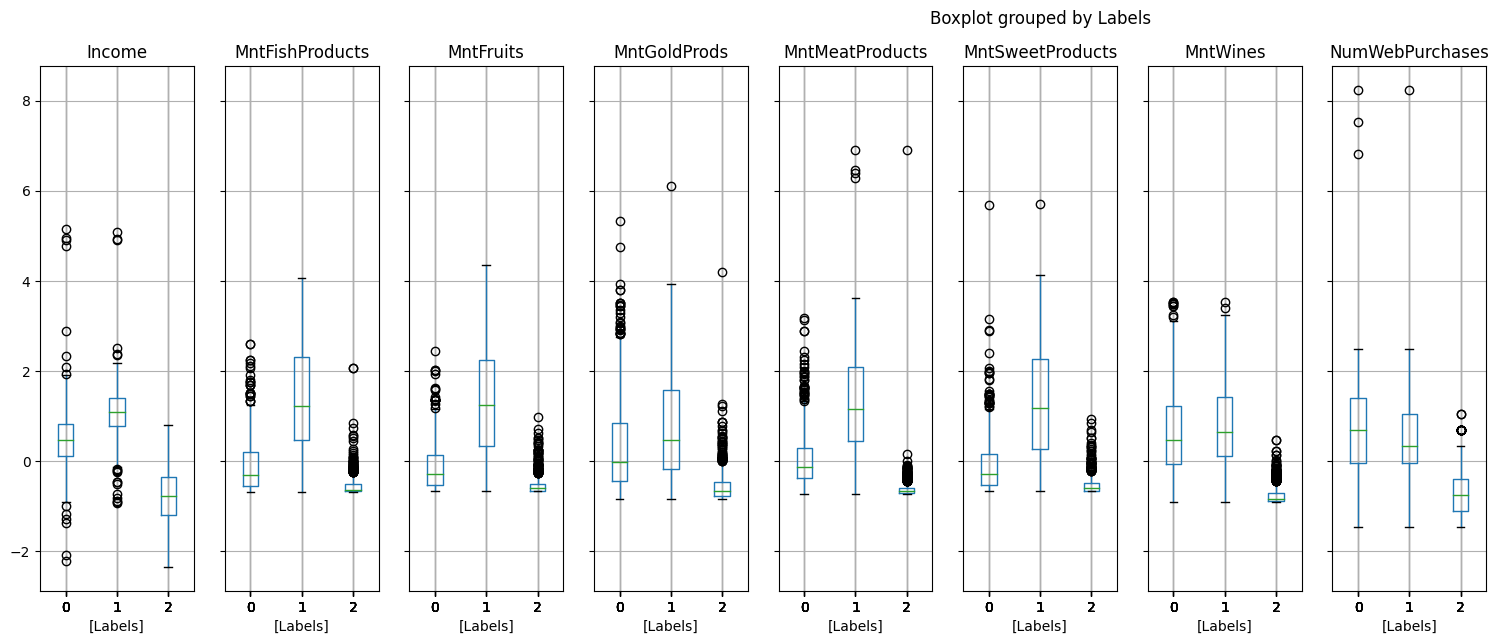

In [140]:
scaled_df2.boxplot(by = 'Labels', layout = (1, 11), figsize = (25, 7)) # displays box plot by labels
plt.show()

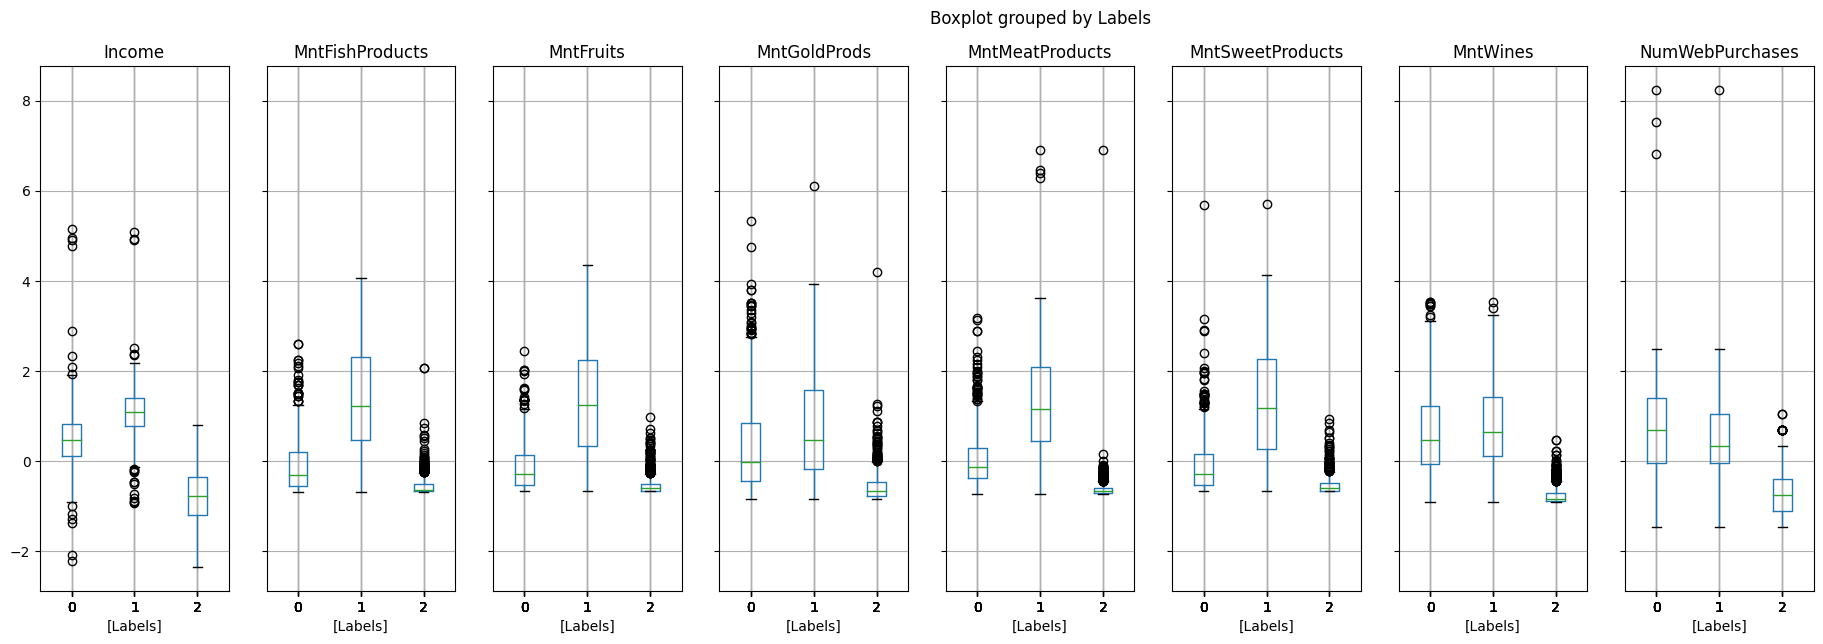

In [141]:
scaled_df2.boxplot(by = 'Labels', layout = (1, 9), figsize = (25, 7)) # displays box plot by labels
plt.show()

In [142]:
kmeds = KMedoids(n_clusters=3, random_state=40)
kmeds.fit(scaled_df2)

KMedoids(n_clusters=3, random_state=40)

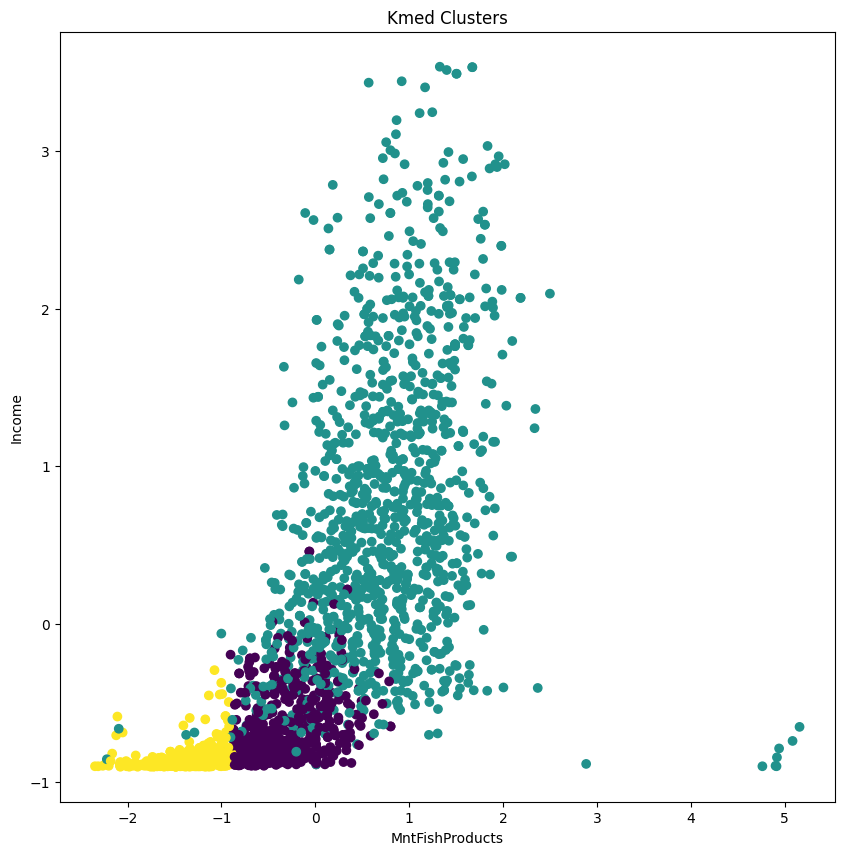

In [143]:
labels = kmeds.labels_        # visualizing using Kmeds
plt.figure(figsize=(10,10))
plt.scatter(scaled_df2.iloc[:,0],scaled_df2.iloc[:,1], c=labels)
plt.title("Kmed Clusters")
plt.xlabel("MntFishProducts")
plt.ylabel("Income")
plt.show()


**Characteristics of each cluster:**


The Yellow cluster represents people with the least amount of money and are least likely to purchase fish.

The Purple cluster represents people with little amounts of money and least likely to purchase fish.

The Green cluster represents people with the highest amounts of money and most likely to purchase fish.

**Observations:**

KMedoids seems to be working the best out of all thus far. It ahs begun to cluster the data and now we have a useful tool.

In [144]:
gmm =  GaussianMixture(n_components=3, random_state=40) # applying gmm algorthim/creating Gaussian Mixture Mode
gmm.fit(scaled_df2)
scaled_df2['GmmLabels'] = gmm.predict(scaled_df2)
scaled_df2["GmmLabels"]


0       2
1       1
2       0
3       1
4       0
       ..
2231    2
2232    0
2233    0
2234    0
2235    1
Name: GmmLabels, Length: 2236, dtype: int64

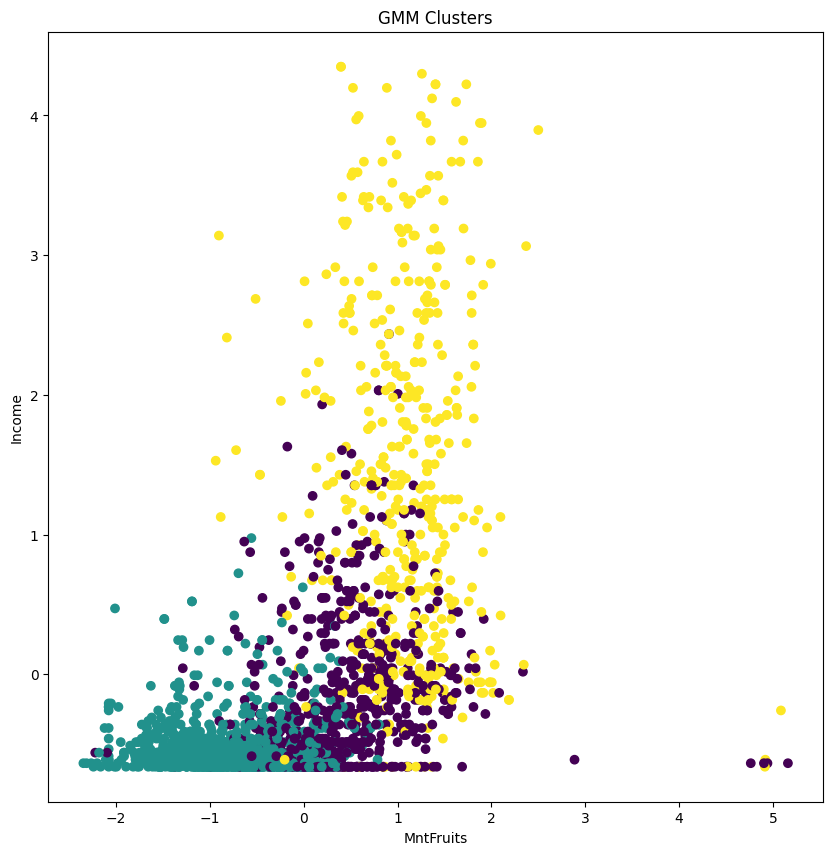

In [145]:
plt.figure(figsize=(10,10)) # visualizing using GMM
plt.scatter(scaled_df2.iloc[:, 0], scaled_df2.iloc[:, 2], c=scaled_df2["GmmLabels"])
plt.title("GMM Clusters")
plt.xlabel("MntFruits")
plt.ylabel("Income")
plt.show()

**Characteristics of each cluster:**


The Green cluster represents people with the least amount of money and the least likely to purchase fruit.

The Purple cluster represents people with the least amount of money and are unlikely to purchase fruit.

The Yellow cluster represents people with the most amount of money therfore the most likely to purchase fruit.


**Observations:**

Just as KMedoids the Gaussian Mixture Model really is a useful tool. I can cluster and make predictions forkm the data.

**Conclusion and Recommendations:**

1. There were several techniques that we used PCA,T-SNE and KMEANS all preformed the poorest, even when using perplexity using T-SNE it did not preform well. KMEDOIDS and GMM preformed identically you were able to get clear and consise clustering and they were clear enough to even predict even with this data set. I am unsure if there is further scope I researched other techniques but am not seasoned enought to make this decision.

2. The most meaninful data point is the more money an individual has allows them to make better decisions on what they purchase. It was clear individuals with the least amount of money could only purchase what they can afford.

3. I actually think we adopt the GMM or KMEDOIDS they both preformed very similary and had the most clear clustering in the data.
